In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d1=pd.read_csv("/content/diabetes.csv")

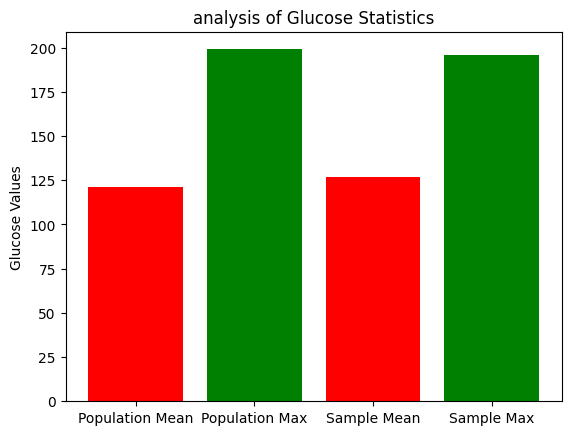

In [3]:

np.random.seed(670)


instance = d1.sample(25)

population_mean_glucose1 = d1['Glucose'].mean()
population_max_glucose1 = d1['Glucose'].max()

sample_mean_glucose2 = instance['Glucose'].mean()
sample_max_glucose2 = instance['Glucose'].max()


# Create a bar chart for comparison
label1 = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
value1 = [population_mean_glucose1, population_max_glucose1, sample_mean_glucose2, sample_max_glucose2]

plt.bar(label1, value1, color=['red', 'green', 'red', 'green'])
plt.title('analysis of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()


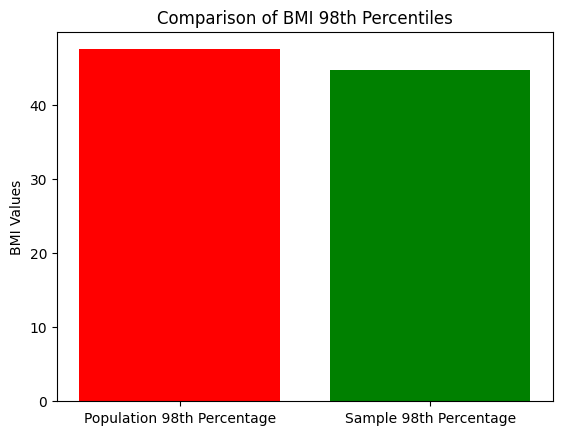

In [4]:
population_percentage = np.percentile(d1['BMI'], 98)
sample_percentage = np.percentile(instance['BMI'], 98)

label1 = ['Population 98th Percentage', 'Sample 98th Percentage']
value1 = [population_percentage, sample_percentage]

plt.bar(label1, value1, color=['red', 'green'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [8]:

bootstrap_instance = 500
instance_size = 150


bootstrap_mean = np.zeros(bootstrap_instance)
bootstrap_standard_devs = np.zeros(bootstrap_instance)
bootstrap_percentage = np.zeros(bootstrap_instance)


for i in range(bootstrap_instance):
    bootstrap_instance = d1['BloodPressure'].sample(instance_size, replace=True)
    bootstrap_mean[i] = bootstrap_instance.mean()
    bootstrap_standard_devs[i] = bootstrap_instance.std()
    bootstrap_percentage[i] = np.percentile(bootstrap_instance, 98)


population_mean = d1['BloodPressure'].mean()
population_standard_devs = d1['BloodPressure'].std()
population_percentage = np.percentile(d1['BloodPressure'], 98)


bsmean=np.mean(bootstrap_mean)
bssd=np.mean(bootstrap_standard_devs)
bsp=np.mean(bootstrap_percentage)


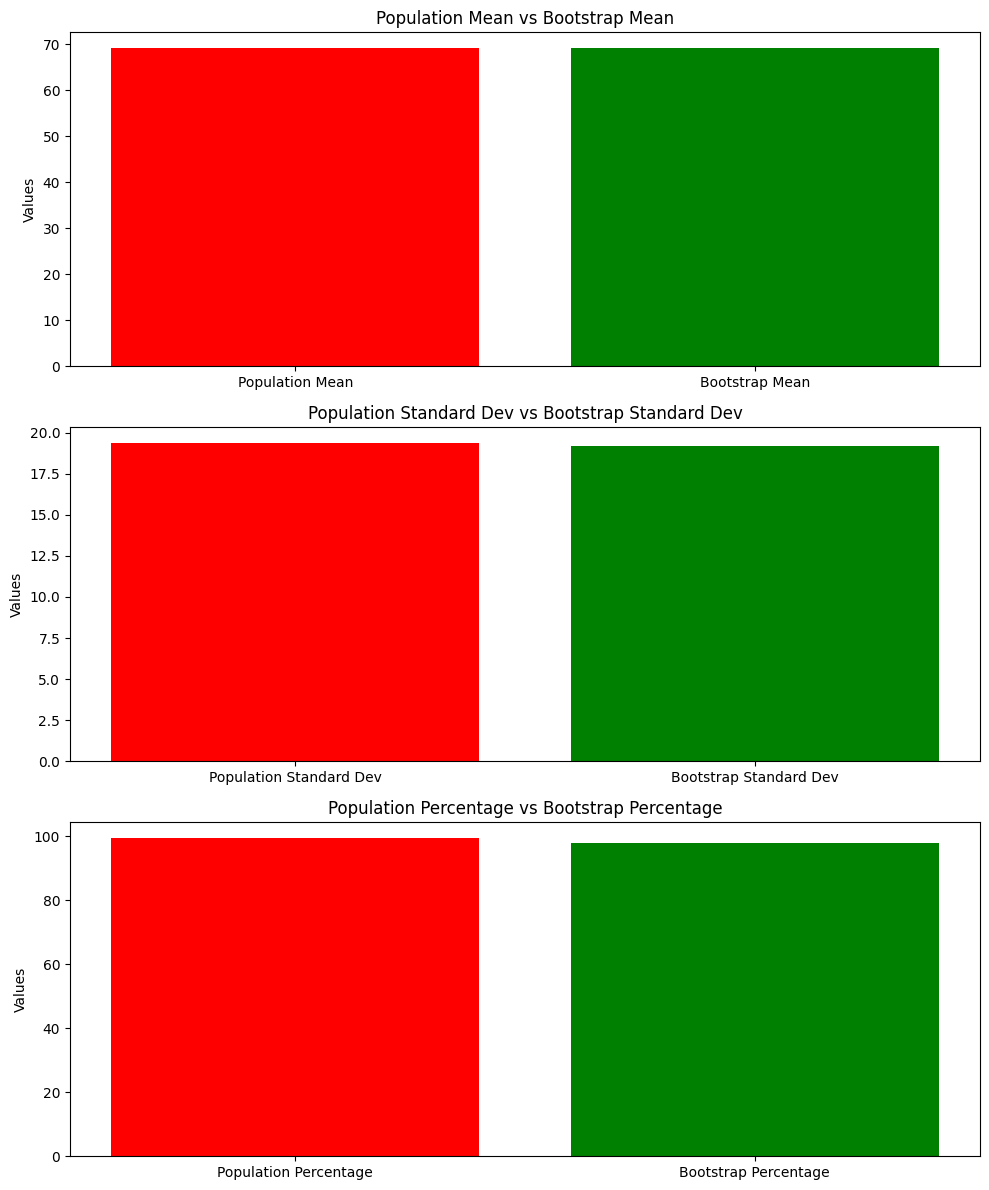

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bsmean], color=['red', 'green'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Standard Dev', 'Bootstrap Standard Dev'], [population_standard_devs, bssd], color=['red', 'green'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Standard Dev vs Bootstrap Standard Dev')


axs[2].bar(['Population Percentage', 'Bootstrap Percentage'], [population_percentage, bsp], color=['red', 'green'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentage vs Bootstrap Percentage')

plt.tight_layout()
plt.show()